In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("./EDA.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
nullcheck = data.isnull().sum()
for col in nullcheck:
    if col != 0:
        print(col)
#모든 열에 걸쳐 null 없음.

In [24]:
nacheck = data.isna().sum()
for col in nacheck:
    if col != 0:
        print(col)
#모든 열에 걸쳐 na 없음


In [52]:
performance_data = data["PerformanceRating"]
performance_data.describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [53]:
three_rate = np.sum(performance_data == 3)
four_rate = np.sum(performance_data == 4)
print(three_rate, four_rate)

#업무성과를 3, 4로만 구분하였기 때문에 성과에 관한 풍부한 정보를 담고 있다고 판단하기 어려움.

1244 226


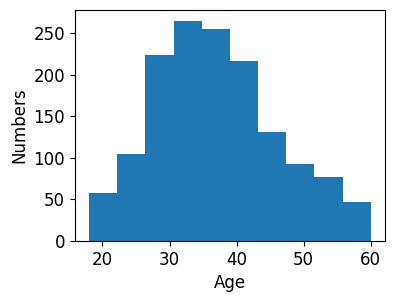

In [56]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()

ax.hist(data['Age'])

ax.set_xlabel('Age')
ax.set_ylabel('Numbers')

plt.show()

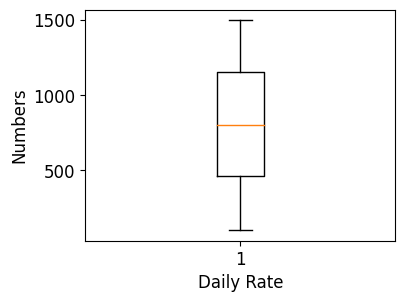

In [57]:
fig, ax = plt.subplots()

ax.boxplot(data["DailyRate"])
ax.set_xlabel('Daily Rate')
ax.set_ylabel('Numbers')

plt.show()

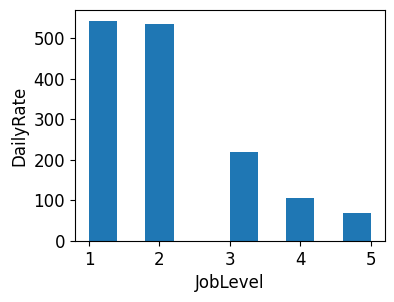

In [87]:
fig, ax = plt.subplots()

ax.hist(data["JobLevel"])
ax.set_xlabel('JobLevel')
ax.set_ylabel('DailyRate')

plt.show()

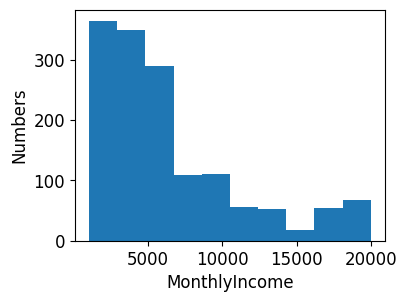

In [60]:
fig, ax = plt.subplots()

ax.hist(data["MonthlyIncome"])
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Numbers')

plt.show()

Text(0, 0.5, 'Age')

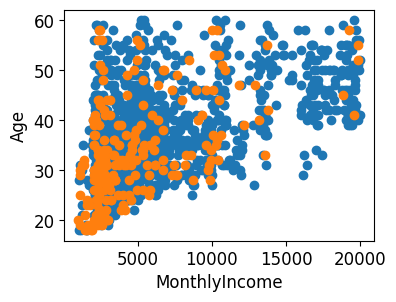

In [68]:
fig, ax = plt.subplots()

groups = data.groupby(data["Attrition"])

for name, group in groups:
    ax.scatter(group["MonthlyIncome"], group["Age"])

ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Age')

#파란색은 퇴직 No, 주황색은 퇴직 Yes.
#수입과 연령을 축으로 했을 때, 퇴직의사 유무 그룹이 각각 비슷한 분포를 보이므로
#수입과 연령만으로 퇴직 의사를 예측할 수 없다고 판단한다.

In [92]:
corrMtx1 = np.corrcoef(data["MonthlyIncome"], data["Education"])
corrMtx2 = np.corrcoef(data["MonthlyIncome"], data["JobInvolvement"])
corrMtx3 = np.corrcoef(data["JobSatisfaction"], data["MonthlyIncome"])
corrMtx4 = np.corrcoef(data["JobSatisfaction"], data["JobInvolvement"])
corrMtx5 = np.corrcoef(data["YearsAtCompany"], data["MonthlyIncome"])
print(corrMtx1[0, 1])
print(corrMtx2[0, 1])
print(corrMtx3[0, 1])
print(corrMtx4[0, 1])
print(corrMtx5[0, 1])

"""
Correlation이 0에 가까울수록, 두 변수가 0에 가깝다는 뜻이다.
위 분석을 보면 Income - Education, Income - JobInvolvement,
Satisfaction - Income, Satisfaction - Involvement는 서로 독립인데 비해
YearsAtCompany와 MonthlyIncome은 상관관계가 0.5까지 증가하는 것을 볼 수 있다.

서로 독립인 변수들일수록 중복되지 않는 정보들을 포함하고 있으므로
Income, Education, Involvement, Satisfaction을 모두 더한 변수를 만들어보겠다.
"""

0.09496067704188874
-0.01527149077873282
-0.007156742355912675
-0.021475910335306724
0.5142848257331967


'\nCorrelation이 0에 가까울수록, 두 변수가 0에 가깝다는 뜻이다.\n위 분석을 보면 Income - Education, Income - MonthlyRate,\n'

In [93]:
data["LinearCombination1"] = data["MonthlyIncome"] + data["Education"] + data["JobInvolvement"] + data["JobSatisfaction"]
data["LinearCombination1"]

0       6002
1       5135
2       2097
3       2919
4       3474
        ... 
1465    2581
1466    9995
1467    6151
1468    5397
1469    4414
Name: LinearCombination1, Length: 1470, dtype: int64

In [101]:
#Attrition의 값이 String이므로, 이를 Integer로 읽을 수 있는 Boolean 변수로 변환.
data["NumerizedAttrition"] = data["Attrition"] == "Yes"
data["NumerizedAttrition"]

0        True
1       False
2        True
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: NumerizedAttrition, Length: 1470, dtype: bool

In [103]:
corrMtx = np.corrcoef(data["NumerizedAttrition"], data["LinearCombination1"])
print(corrMtx)

"""
독립성이 강한 변수들끼리 더한 변수는 Attrition 여부를 더 잘 예측하는 것으로 드러났다.
이와 같이 독립성이 강한 변수들을 더하여 Linear Combination할 수 있다면
범주형 변수의 예측 효과가 더 증가할 것으로 기대한다.
"""

[[ 1.         -0.15988762]
 [-0.15988762  1.        ]]
